In [49]:
import csv
import pandas as pd
import numpy as np
import os

In [11]:
def attention_filename_for_hla_and_peptide(hla, peptide):
    return f"results/attention\\{hla.replace(':', '_').replace('*', '_')}_{peptide}_attention.csv"

In [30]:
data = pd.read_csv(attention_filename_for_hla_and_peptide("HLA-A*01:01", "AAHSARPPPY"))
print(data)
type(data)
data.columns

aminoacids = [data.columns[i][0] for i in range(1, len(data.columns))]
aminoacids

   Unnamed: 0         A       A.1         H         S       A.2         R  \
0           Y  0.094325  0.093094  0.128537  0.105539  0.068115  0.209524   
1           F  0.164958  0.149420  0.308848  0.340853  0.113617  0.849655   
2           A  0.213492  0.201716  0.229285  0.064774  0.215036  0.200010   
3           M  0.217335  0.241155  0.126787  0.070436  0.176070  0.397896   
4           Y  0.155086  0.155931  0.151623  0.121196  0.140737  0.285950   
5           Q  0.314955  0.240707  0.464012  0.044147  0.117955  0.735629   
6           E  0.073052  0.077965  0.208764  0.061027  0.059513  0.063901   
7           N  0.319620  0.247608  0.149875  0.062248  0.191860  0.215202   
8           M  0.190476  0.155494  0.091967  0.052482  0.084534  0.381217   
9           A  0.263867  0.292321  0.191308  0.184630  0.271488  0.258083   
10          H  0.632407  0.366633  0.460867  0.041554  0.134618  0.425589   
11          T  0.134182  0.122508  0.105289  0.128994  0.115079  0.071785   

['A', 'A', 'H', 'S', 'A', 'R', 'P', 'P', 'P', 'Y']

In [20]:
data.iloc[-1,1]

0.1200680821106778

In [33]:
for i in range(1, len(data.columns)):
    print("pos:", i, "aa:", aminoacids[i-1], "contribution:", data.iloc[-1, i])

pos: 1 aa: A contribution: 0.1200680821106778
pos: 2 aa: A contribution: 0.111360680806215
pos: 3 aa: H contribution: 0.0914889357343745
pos: 4 aa: S contribution: 0.060283186299951
pos: 5 aa: A contribution: 0.0733904890631963
pos: 6 aa: R contribution: 0.153094589266008
pos: 7 aa: P contribution: 0.0544344887333443
pos: 8 aa: P contribution: 0.0613708577711266
pos: 9 aa: P contribution: 0.074813855910412
pos: 10 aa: Y contribution: 0.1996948343046941


In [63]:
cum_contrib_for_length8 = np.zeros(8)
cum_contrib_for_length9 = np.zeros(9)
cum_contrib_for_length10 = np.zeros(10)
cum_contrib_for_length11 = np.zeros(11)
cum_contrib_for_length12 = np.zeros(12)
cum_contrib_for_length13 = np.zeros(13)
cum_contrib_for_length14 = np.zeros(14)

cum_contrib_2d = np.zeros((7, 14))

In [65]:
pairs_data = pd.read_csv("1696_iedb_random_negative_pairs.csv")
print(pairs_data)
for i in range(len(pairs_data)):
    pep = pairs_data['peptide'][i]
    hla = pairs_data['hla'][i]

    if os.path.isfile(f"./{attention_filename_for_hla_and_peptide(hla, pep)}"):
        print(f"{attention_filename_for_hla_and_peptide(hla, pep)} exists")
        data = pd.read_csv(attention_filename_for_hla_and_peptide(hla, pep))

        if len(pep) == 8:
            for j in range(1, len(data.columns)):
                # print("pos:", j, "contribution:", data.iloc[-1, j])

                cum_contrib_for_length8[j-1] += data.iloc[-1, j]
                cum_contrib_2d[0, j-1] += data.iloc[-1, j]
        
        if len(pep) == 9:
            for j in range(1, len(data.columns)):
                # print("pos:", j, "contribution:", data.iloc[-1, j])

                cum_contrib_for_length9[j-1] += data.iloc[-1, j]
                cum_contrib_2d[1, j-1] += data.iloc[-1, j]
        
        if len(pep) == 10:
            for j in range(1, len(data.columns)):
                # print("pos:", j, "contribution:", data.iloc[-1, j])

                cum_contrib_for_length10[j-1] += data.iloc[-1, j]
                cum_contrib_2d[2, j-1] += data.iloc[-1, j]
        
        if len(pep) == 11:
            for j in range(1, len(data.columns)):
                # print("pos:", j, "contribution:", data.iloc[-1, j])

                cum_contrib_for_length11[j-1] += data.iloc[-1, j]
                cum_contrib_2d[3, j-1] += data.iloc[-1, j]
        
        if len(pep) == 12:
            for j in range(1, len(data.columns)):
                # print("pos:", j, "contribution:", data.iloc[-1, j])

                cum_contrib_for_length12[j-1] += data.iloc[-1, j]
                cum_contrib_2d[4, j-1] += data.iloc[-1, j]
        
        if len(pep) == 13:
            for j in range(1, len(data.columns)):
                # print("pos:", j, "contribution:", data.iloc[-1, j])

                cum_contrib_for_length13[j-1] += data.iloc[-1, j]
                cum_contrib_2d[5, j-1] += data.iloc[-1, j]
     
        if len(pep) == 14:
            for j in range(1, len(data.columns)):
                # print("pos:", j, "contribution:", data.iloc[-1, j])

                cum_contrib_for_length14[j-1] += data.iloc[-1, j]
                cum_contrib_2d[6, j-1] += data.iloc[-1, j]


print(cum_contrib_for_length8)
print(cum_contrib_for_length9)
print(cum_contrib_for_length10)
print(cum_contrib_for_length11)
print(cum_contrib_for_length12)
print(cum_contrib_for_length13)
print(cum_contrib_for_length14)

        peptide          hla                        hla_sequence
0      DEFVVVTV  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
1      TLNNGSQA  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
2      LEDKAFQL  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
3      RYSHWTKL  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
4      NRKLLDIA  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
...         ...          ...                                 ...
1691  YIIPCILIL  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1692  SFLHWFHHL  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1693  KRMMIRYCL  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1694  FTARIIIFS  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1695  KSRRFTVRF  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY

[1696 rows x 3 columns]
results/attention\HLA-A_01_01_DEFVVVTV_attention.csv exists
results/attention\HLA-A_01_01_TLNNGSQA_attention.csv exists
results/attention\HLA-A_01_01_LEDKAFQL_attention.csv exists
results/attenti

In [78]:
cum_contrib_2d
sums = np.sum(cum_contrib_2d, -1)

normalized = cum_contrib_2d / sums[:, np.newaxis]
normalized

array([[0.18303647, 0.18573626, 0.13298585, 0.10021374, 0.09616471,
        0.09296254, 0.09483951, 0.11406093, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.16440978, 0.14257471, 0.11678709, 0.09730031, 0.08081915,
        0.08952565, 0.08655928, 0.09568045, 0.12634357, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.1357515 , 0.13487257, 0.11324532, 0.07920027, 0.07193514,
        0.07690267, 0.08090321, 0.08107111, 0.08975853, 0.13635969,
        0.        , 0.        , 0.        , 0.        ],
       [0.12986013, 0.11080601, 0.0895944 , 0.07793516, 0.06924472,
        0.06667829, 0.06868574, 0.07301803, 0.0846942 , 0.10053115,
        0.12895217, 0.        , 0.        , 0.        ],
       [0.12059321, 0.11780804, 0.08669863, 0.05967151, 0.06766029,
        0.06914901, 0.06645208, 0.07664643, 0.0662661 , 0.09823163,
        0.08640737, 0.08441569, 0.        , 0.        ],
       [0.10467863, 0.09711607, 0.0

In [87]:
cum_contrib_2d_positive = np.zeros((7, 14))
cum_contrib_2d_negative = np.zeros((7, 14))

In [108]:
transphla_pairs = pd.read_csv("results/predict_results.csv")

print(transphla_pairs)
print(transphla_pairs['y_pred'])
for i in range(len(transphla_pairs)):
    pep = transphla_pairs['peptide'][i]
    hla = transphla_pairs['HLA'][i]
    pred = transphla_pairs['y_pred'][i]

    if pred == 1:
        # print("pred=1")
        if os.path.isfile(f"./{attention_filename_for_hla_and_peptide(hla, pep)}"):
            # print(f"{attention_filename_for_hla_and_peptide(hla, pep)} exists")
            data = pd.read_csv(attention_filename_for_hla_and_peptide(hla, pep))

            if len(pep) == 8:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_positive[0, j-1] += data.iloc[-1, j]
            
            if len(pep) == 9:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_positive[1, j-1] += data.iloc[-1, j]
            
            if len(pep) == 10:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_positive[2, j-1] += data.iloc[-1, j]
            
            if len(pep) == 11:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_positive[3, j-1] += data.iloc[-1, j]
            
            if len(pep) == 12:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_positive[4, j-1] += data.iloc[-1, j] 
            
            if len(pep) == 13:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_positive[5, j-1] += data.iloc[-1, j]
        
            if len(pep) == 14:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_positive[6, j-1] += data.iloc[-1, j]


    else:
        # print("pred=0")
        if os.path.isfile(f"./{attention_filename_for_hla_and_peptide(hla, pep)}"):
            # print(f"{attention_filename_for_hla_and_peptide(hla, pep)} exists")
            data = pd.read_csv(attention_filename_for_hla_and_peptide(hla, pep))

            if len(pep) == 8:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_negative[0, j-1] += data.iloc[-1, j]
            
            if len(pep) == 9:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_negative[1, j-1] += data.iloc[-1, j]
            
            if len(pep) == 10:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_negative[2, j-1] += data.iloc[-1, j]
            
            if len(pep) == 11:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_negative[3, j-1] += data.iloc[-1, j]
            
            if len(pep) == 12:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_negative[4, j-1] += data.iloc[-1, j] 
            
            if len(pep) == 13:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_negative[5, j-1] += data.iloc[-1, j]
        
            if len(pep) == 14:
                for j in range(1, len(data.columns)):
                    cum_contrib_2d_negative[6, j-1] += data.iloc[-1, j]


              HLA                        HLA_sequence    peptide  y_pred  \
0     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   DEFVVVTV       0   
1     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   TLNNGSQA       0   
2     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   LEDKAFQL       1   
3     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   RYSHWTKL       0   
4     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   NRKLLDIA       0   
...           ...                                 ...        ...     ...   
1691  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  YIIPCILIL       1   
1692  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  SFLHWFHHL       0   
1693  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  KRMMIRYCL       1   
1694  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  FTARIIIFS       1   
1695  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  KSRRFTVRF       1   

      y_prob  
0     0.0000  
1     0.0000  
2     0.9999  
3     0.0009  
4     0.0000

In [115]:
sums_neg = np.sum(cum_contrib_2d_negative, -1)

normalized_neg = cum_contrib_2d_negative / sums_neg[:, np.newaxis]

print(cum_contrib_2d_positive)
sums_pos = np.sum(cum_contrib_2d_positive, -1)


normalized_pos = cum_contrib_2d_positive / sums_pos[:, np.newaxis]


[[ 9.27743587  9.22137994  7.0726587   5.22308864  4.68629817  4.87533339
   4.73351067  5.91029464  0.          0.          0.          0.
   0.          0.        ]
 [11.69685609  9.77626613  8.66979518  6.51354666  5.26201491  6.26626569
   5.69036667  6.44181918  8.68306951  0.          0.          0.
   0.          0.        ]
 [ 8.37642605  8.46822954  7.03694395  4.68818585  4.26393137  4.64950822
   5.07788109  4.90926895  5.57173059  8.95789439  0.          0.
   0.          0.        ]
 [ 6.37939448  5.36019659  4.66974086  3.88185644  3.60337278  3.40235148
   3.34308327  3.83147509  3.97745512  5.10749263  7.44358125  0.
   0.          0.        ]
 [ 0.70411358  0.62901291  0.52459482  0.33344458  0.44567107  0.39675128
   0.39802952  0.44955228  0.39586188  0.58885298  0.56484769  0.5692674
   0.          0.        ]
 [ 0.5546662   0.50243517  0.35676126  0.45858223  0.40568936  0.3773672
   0.40387086  0.46010026  0.42580429  0.51282926  0.42607215  0.55793825
   0.557883

C:\Users\LukaBursic\AppData\Local\Temp\ipykernel_21408\3691002634.py:9: RuntimeWarning: invalid value encountered in divide
  normalized_pos = cum_contrib_2d_positive / sums_pos[:, np.newaxis]


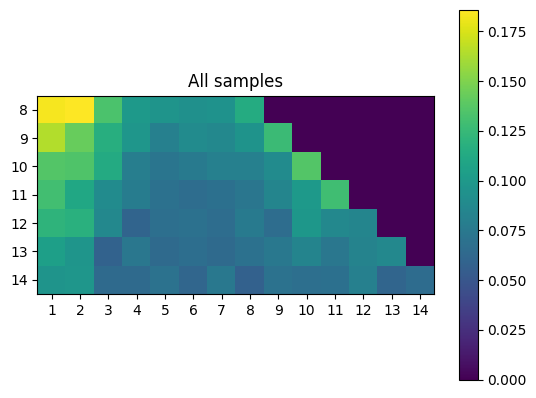

In [113]:
import matplotlib.pyplot as plt 
plt.imshow( normalized ) 
  
plt.title( "All samples" ) 
plt.colorbar() 
plt.xticks(ticks=range(14), labels=range(1, 15))
plt.yticks(ticks=range(7), labels=range(8, 15))
plt.show() 

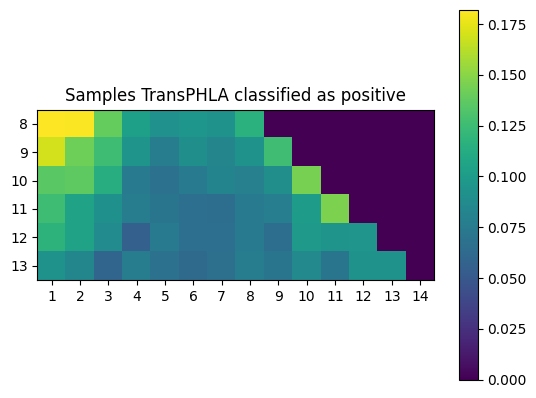

In [121]:
import matplotlib.pyplot as plt 
plt.imshow( normalized_pos[:-1] ) 
  
plt.title( "Samples TransPHLA classified as positive" ) 
plt.colorbar() 
plt.xticks(ticks=range(14), labels=range(1, 15))
plt.yticks(ticks=range(6), labels=range(8, 14))
plt.show() 

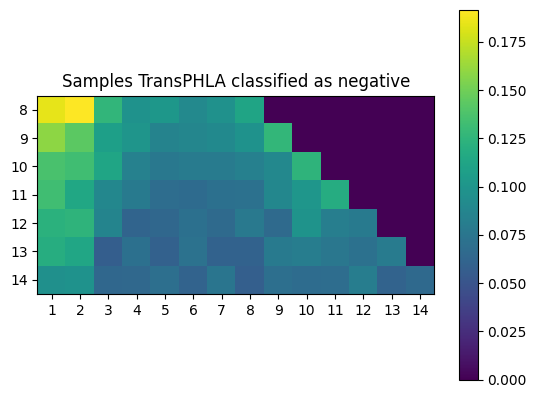

In [112]:
import matplotlib.pyplot as plt 
plt.imshow( normalized_neg ) 
  
plt.title( "Samples TransPHLA classified as negative" ) 
plt.colorbar() 
plt.xticks(ticks=range(14), labels=range(1, 15))
plt.yticks(ticks=range(7), labels=range(8, 15))
plt.show() 